In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression as LR, Ridge as RG
from sklearn.metrics import mean_squared_error as mse, r2_score as r2
import sklearn.datasets as skds

#### Визуализация результатов модели

In [2]:
def evaluate_preds(true_val, pred_val):
    print("R2:\t" + str(round(r2(true_val, pred_val), 3)) + "\n" +
          "RMSE:\t" + str(round(np.sqrt(mse(true_val, pred_val)), 3)) + "\n" +
          "MSE:\t" + str(round(mse(true_val, pred_val), 3))
         )
    
    plt.figure(figsize=(8, 8))
    
    sns.scatterplot(x=pred_val, y=true_val)
    plt.plot([0, 50], [0, 50], linestyle='--', color='black')
    
    plt.xlabel('Predicted Values')
    plt.ylabel('True Values')
    plt.title('True vs Predicted values')
    
    plt.show

#### Создаём датафрейм

In [3]:
ds = skds.load_boston()

In [4]:
df = pd.DataFrame(ds.data)
df.columns = ds.feature_names
price = np.asarray(ds.target)
df['PRICE'] = pd.Series(price)

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


#### Сравнение линейной регрессии и l2 регуляризации

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(df.iloc[:, :-1], df.iloc[:, -1], shuffle=True, test_size=0.2)

print(X_train.shape)
print(X_test.shape)

(404, 13)
(102, 13)


R2:	0.739
RMSE:	4.836
MSE:	23.39


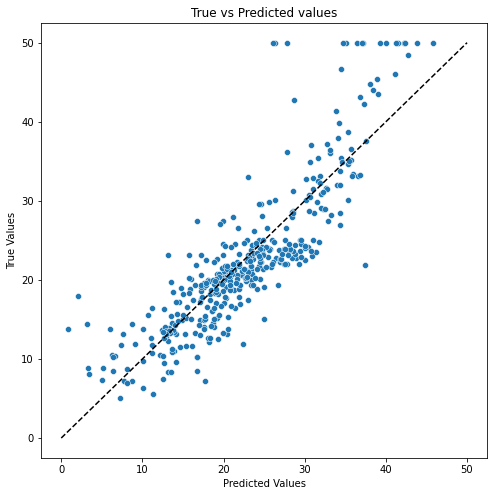

In [6]:
# TRAIN
lin_model = LR()
lin_model.fit(X_train, Y_train)
y_pred_lin = lin_model.predict(X_train)

evaluate_preds(Y_train, y_pred_lin)

R2:	0.721
RMSE:	4.204
MSE:	17.677


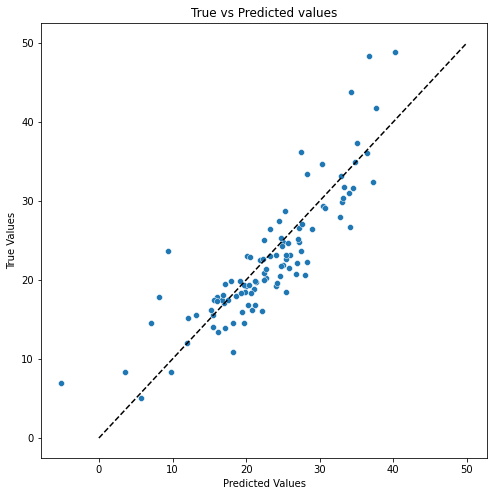

In [7]:
# TEST
y_pred_lin = lin_model.predict(X_test)

evaluate_preds(Y_test, y_pred_lin)

R2:	0.738
RMSE:	4.85
MSE:	23.521


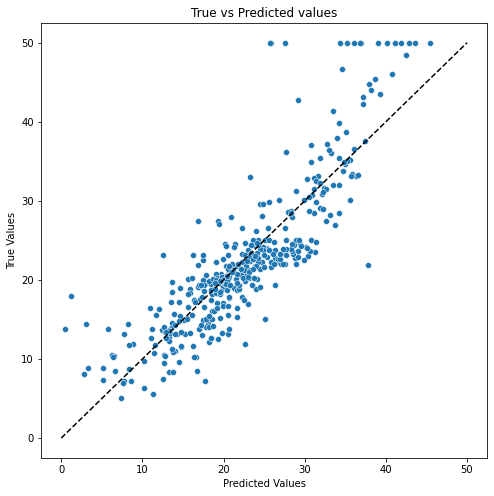

In [8]:
# TRAIN
l2_model = RG(alpha=0.5)
l2_model.fit(X_train, Y_train)
y_pred_l2 = l2_model.predict(X_train)

evaluate_preds(Y_train, y_pred_l2)

R2:	0.736
RMSE:	4.088
MSE:	16.709


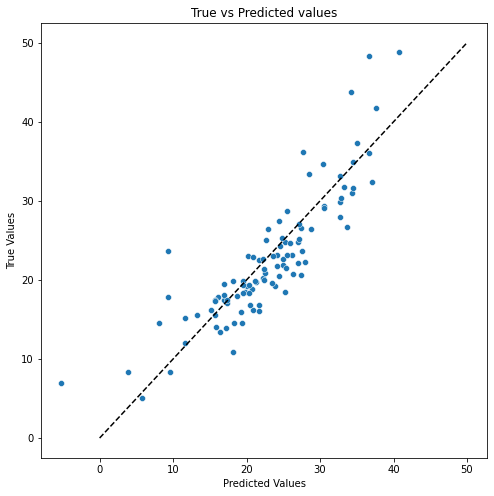

In [9]:
# TEST
y_pred_l2 = l2_model.predict(X_test)

evaluate_preds(Y_test, y_pred_l2)

#### Вывод

В данной выборке l2 немного лучше простой линейной регрессии (в предыдущих были примерно одинаковые результаты)